In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.font_manager as fm
font_path = '/users/wanglikun/.local/share/fonts/arial.ttf'  
fm.fontManager.addfont(font_path)                            
arial_name = fm.FontProperties(fname=font_path).get_name()  
plt.rcParams['font.family'] = [arial_name]
plt.rcParams['axes.unicode_minus'] = False

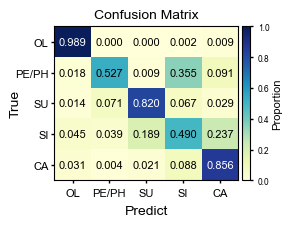

In [2]:
def get_test(file):
    data = pd.read_csv(file)
    df_test = data[data["split"]=="test"].copy()
    df_test["true"] = df_test.iloc[:, 0].str.upper()
    df_test["pred"] = df_test["pred"].str.upper()
    df_test["true"] = df_test.iloc[:, 0].replace("PE", "PE/PH")
    df_test["pred"] = df_test["pred"].replace("PE", "PE/PH")
    return df_test
    
def get_matrix(df_test, order):
    cm_sum = np.zeros((len(order), len(order)), dtype=float)
    n_runs = df_test["run"].nunique()
    for run_id, df_run in df_test.groupby("run"):
        cm = confusion_matrix(df_run["true"], df_run["pred"], labels=order)
        cm_sum += cm
    cm_avg = cm_sum / n_runs
    cm_norm = cm_avg / cm_avg.sum(axis=1, keepdims=True)
    return cm_norm   
    
def plot_heat(ax, mat, title, xlabels, ylabels):
    im = ax.imshow(mat, aspect="auto", vmin=0.0, vmax=1.0, cmap="YlGnBu")
    ax.set_xticks(np.arange(len(xlabels)))
    ax.set_xticklabels(xlabels, fontsize=8)
    ax.set_yticks(np.arange(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=8, rotation=0, ha="right")
    ax.tick_params(axis="y", pad=2)
    ax.set_title(title, fontsize=10)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            v = mat[i, j]
            ax.text(j, i, f"{v:.3f}",
                    ha="center", va="center",
                    color=("white" if v >= 0.65 else "black"),
                    fontsize=8)
    return im    
    
df_test_AC2AC = get_test("dataset/A2C.csv")
order = ["OL", "PE/PH", "SU", "SI", "CA"]
cm_AC2AC = get_matrix(df_test_AC2AC, order)

fig, ax = plt.subplots(figsize=(2.7, 2))

im1 = plot_heat(ax, cm_AC2AC, "Confusion Matrix", order, order)
ax.set_ylabel("True", fontsize=10, labelpad=-5)
ax.set_xlabel("Predict", fontsize=10, labelpad=5)

cbar = fig.colorbar(im1, ax=ax, orientation="vertical", fraction=0.1, pad=0.02)
cbar.set_label("Proportion", fontsize=8, labelpad=2)
cbar.ax.tick_params(labelsize=6)
cbar.ax.tick_params(which="both", width=1, length=2)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="both", which="both",
               direction="out", length=2, width=1, colors="black")

plt.savefig("figure/4b.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

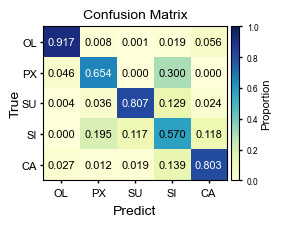

In [3]:
df_test_AC2AC = get_test("dataset/C2A.csv")
order = ["OL", "PX", "SU", "SI", "CA"]
cm_AC2AC = get_matrix(df_test_AC2AC, order)

fig, ax = plt.subplots(figsize=(2.7, 2))

im1 = plot_heat(ax, cm_AC2AC, "Confusion Matrix", order, order)
ax.set_ylabel("True", fontsize=10, labelpad=0)
ax.set_xlabel("Predict", fontsize=10, labelpad=5)

cbar = fig.colorbar(im1, ax=ax, orientation="vertical", fraction=0.1, pad=0.02)
cbar.set_label("Proportion", fontsize=8, labelpad=2)
cbar.ax.tick_params(labelsize=6)
cbar.ax.tick_params(which="both", width=1, length=2)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="both", which="both",
               direction="out", length=2, width=1, colors="black")

plt.savefig("figure/4e.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import umap
import matplotlib.font_manager as fm
font_path = '/users/wanglikun/.local/share/fonts/arial.ttf'  
fm.fontManager.addfont(font_path)                            
arial_name = fm.FontProperties(fname=font_path).get_name()  
plt.rcParams['font.family'] = [arial_name]
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv("dataset/A2C_UMAP.csv")

ID = 1
df = data.iloc[2180*ID:2180*(ID+1),:]
df = df.reset_index(drop=True)
X = StandardScaler().fit_transform(df.iloc[:,:160]) 
reducer = umap.UMAP(
    n_neighbors=10,     
    min_dist=1,      
    n_components=2,     
    metric='cosine',   
    random_state=0
)

X_umap = reducer.fit_transform(X)   

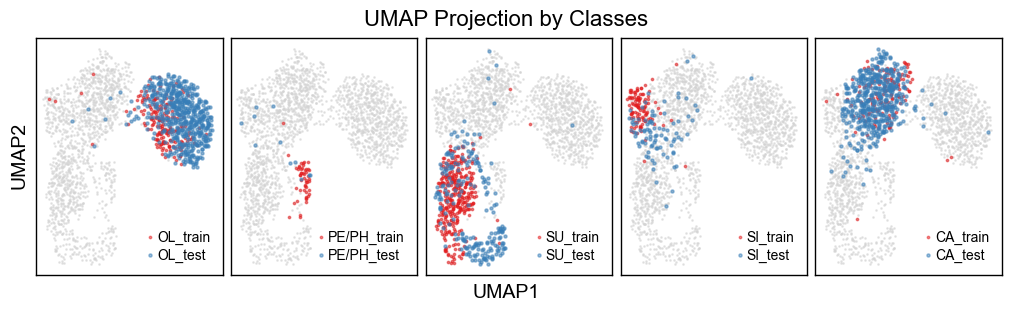

In [3]:
plt.rcParams.update({'xtick.labelsize': 6, 'ytick.labelsize': 6}) 
classes = ["ol", "pe/ph", "su", "si", "ca"]  

subsetA = df.iloc[:830].copy()
subsetB = df.iloc[830:].copy()

labA = subsetA["label"].astype(str).str.strip().str.lower()
labB = subsetB["label"].astype(str).str.strip().str.lower()

x_min, x_max = X_umap[:,0].min()*1.1, X_umap[:,0].max()*1.1
y_min, y_max = X_umap[:,1].min()*1.1, X_umap[:,1].max()*1.1

fig, axes = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)

for i, cls in enumerate(classes):
    ax = axes[i]
    idxA = subsetA.index[labA == cls]
    idxB = subsetB.index[labB == cls]

    ax.scatter(X_umap[:,0], X_umap[:,1], s=1, c="lightgray", alpha=0.5, label="_nolegend_")

    if len(idxA):
        ax.scatter(X_umap[idxA,0], X_umap[idxA,1], s=3, c='#E41A1C',
                   marker="o", alpha=0.5, label=f"{cls.upper()}_train")

    if len(idxB):
        ax.scatter(X_umap[idxB,0], X_umap[idxB,1], s=5, c='#377EB8',
                   marker="o", alpha=0.5, label=f"{cls.upper()}_test")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.legend(fontsize=10,
              frameon=False,
              handletextpad=-0.5,
              labelspacing=0.3,
              loc="lower right")

    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
                   right=False, labelbottom=False, labelleft=False)

    for spine in ax.spines.values():
        spine.set_linewidth(1)

fig.suptitle("UMAP Projection by Classes", fontsize=16)
fig.supxlabel("UMAP1", fontsize=14)
fig.supylabel("UMAP2", fontsize=14)

plt.savefig("figure/4c.png", dpi=300, bbox_inches="tight", transparent=True) 
plt.show()


In [4]:
data = pd.read_csv("dataset/C2A_UMAP.csv")

ID = 1
df = data.iloc[2180*ID:2180*(ID+1),:]
df = df.reset_index(drop=True)
X = StandardScaler().fit_transform(df.iloc[:,:160]) 
reducer = umap.UMAP(
    n_neighbors=10,     
    min_dist=1,      
    n_components=2,     
    metric='cosine',   
    random_state=0
)

X_umap = reducer.fit_transform(X)   

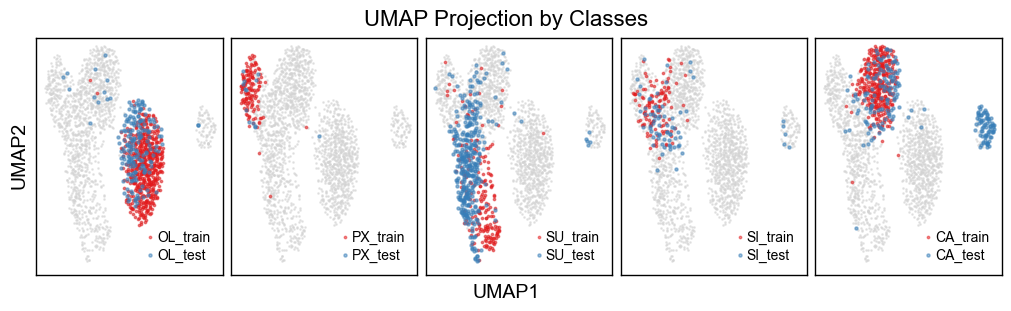

In [6]:
plt.rcParams.update({'xtick.labelsize': 6, 'ytick.labelsize': 6}) 
classes = ["ol", "px", "su", "si", "ca"]  

subsetA = df.iloc[830:].copy()
subsetB = df.iloc[:830].copy()

labA = subsetA["label"].astype(str).str.strip().str.lower()
labB = subsetB["label"].astype(str).str.strip().str.lower()

x_min, x_max = X_umap[:,0].min()*1.1, X_umap[:,0].max()*1.1
y_min, y_max = X_umap[:,1].min()*1.1, X_umap[:,1].max()*1.1

fig, axes = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)

for i, cls in enumerate(classes):
    ax = axes[i]
    idxA = subsetA.index[labA == cls]
    idxB = subsetB.index[labB == cls]

    ax.scatter(X_umap[:,0], X_umap[:,1], s=1, c="lightgray", alpha=0.5, label="_nolegend_")

    if len(idxA):
        ax.scatter(X_umap[idxA,0], X_umap[idxA,1], s=3, c='#E41A1C',
                   marker="o", alpha=0.5, label=f"{cls.upper()}_train")

    if len(idxB):
        ax.scatter(X_umap[idxB,0], X_umap[idxB,1], s=5, c='#377EB8',
                   marker="o", alpha=0.5, label=f"{cls.upper()}_test")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.legend(fontsize=10,
              frameon=False,
              handletextpad=-0.5,
              labelspacing=0.3,
              loc="lower right")

    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
                   right=False, labelbottom=False, labelleft=False)

    for spine in ax.spines.values():
        spine.set_linewidth(1)

fig.suptitle("UMAP Projection by Classes", fontsize=16)
fig.supxlabel("UMAP1", fontsize=14)
fig.supylabel("UMAP2", fontsize=14)

plt.savefig("figure/4f.png", dpi=300, bbox_inches="tight", transparent=True) 
plt.show()
